## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [57]:
#1. Performing Exploratory Data Analysis:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [58]:
# Loading the data set provided using the pandas
df_titanic = pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/assgnment/Assignment 3/titanic.csv")

In [59]:
# Let us explore/understand the data using the first few rows of the data
# Let's view the first few rows of the data:

print(df_titanic.head())

# From the below output we get the first few rows of data where each variable defines an important input of the data set such as:
#1. PassengerId: the id of each passenger boarded which is a numerical variable
#2. Survived: defines if the passenger survived or not with boolean values i.e., (0 = No(not survived), 1 = Yes(survived)), which is a categorical variable
#3. Pclass: A proxy for socio-economic status (SES) 1st = Upper, 2nd = Middle, 3rd = Lower, which is a categorical variable
#4. Name: The name of each passenger boarded
#5. Sex: The gender of the passenger boarded, which is either male or female, so it is a categorical variable
#6. Age: The Age of passenger, since it's not provided in a range, we can consider this as a numerical variable
#7. SibSp: number of siblings / spouses aboard the Titanic, it does help us for the hypothesis, so we can consider this as a nuerical variable
#8. Parch: number of parents / children aboard the Titanic, it does help us for the hypothesis, so we can consider this as a nuerical variable
#9. Ticket: Ticket number, it does help us for the hypothesis, so we can consider this as a nuerical variable
#10. Fare: Passenger fare,this as a numerical variable
#11. Cabin: Cabin number, it is a categorical variable
#12. Embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton, which is categorical variables, but cannot be used for our hypothesis



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [60]:
# Let's get the data set information
print(df_titanic.info())
# the below output gives the data set size, i.e., the number of observations and variables, the data type of variables and the memory used to store this data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [61]:
# Summary statistics
print(df_titanic.describe())

#provides the summary of the variables

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [62]:
# Converting columns to categorical data type
df_titanic['Survived'] = df_titanic['Survived'].astype('category')
df_titanic['Pclass'] = df_titanic['Pclass'].astype('category')
df_titanic['Sex'] = df_titanic['Sex'].astype('category')
df_titanic['Cabin'] = df_titanic['Cabin'].astype('category')
df_titanic['Embarked'] = df_titanic['Embarked'].astype('category')


In [63]:
# We can also do the same for numeric variables which are useful, for the better understanding and usage of data to fill out missing or blank values further
# Converting columns to numeric data type
df_titanic['Age'] = pd.to_numeric(df_titanic['Age'])
df_titanic['Fare'] = pd.to_numeric(df_titanic['Fare'])
df_titanic['SibSp'] = pd.to_numeric(df_titanic['SibSp'])  
df_titanic['Parch'] = pd.to_numeric(df_titanic['Parch']) 

In [64]:
# Finding the median for numeric columns which is not mentioned in describe function, which we use to fill missing values
# Select numeric columns
numeric_cols = df_titanic.select_dtypes(include=[np.number])

# Calculate the median for numeric columns
numeric_medians = numeric_cols.median()
print(numeric_medians)

PassengerId    446.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64


In [84]:
# Missing values
# Checking for missing values
print(df_titanic.isnull().sum())

#From the below output we have the missing values in Age(numeric), Cabin(categorical) and Embarked(categorical), where we need to impute median values in blanks
#oe missing values for numeric varibales and mode for categorical variables.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [86]:
# Filling missing values in numerical columns with median:
# Select numeric columns
# Calculate the median of the 'Age' column
median_age = df_titanic['Age'].median()

# Filling missing values in the 'Age' column with the median
df_titanic['Age'] = df_titanic['Age'].fillna(median_age)


In [82]:
# Filling missing values in categorical columns with mode
# Impute missing values for 'Cabin' column using mode
mode_cabin = df_titanic['Cabin'].mode()[0]
df_titanic['Cabin'] = df_titanic['Cabin'].fillna(mode_cabin)

# Impute missing values for 'Embarked' column using mode
mode_embarked = df_titanic['Embarked'].mode()[0]
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(mode_embarked)


In [87]:
#Rechecking for missing values after imputing for categorical and numerical missing values
print(df_titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [88]:
# Saving the imputed DataFrame to a new Excel file in a specified directory
df_titanic.to_excel('C:/Users/LENOVO/OneDrive/Desktop/CPSC-4800/assgnment/Assignment 3/imputed_titanic_dataset.xlsx', index=False)

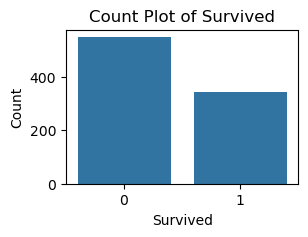

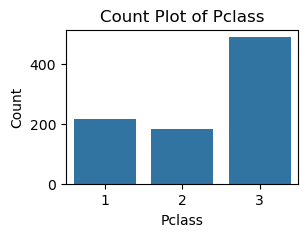

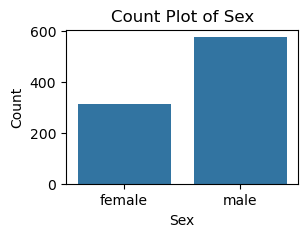

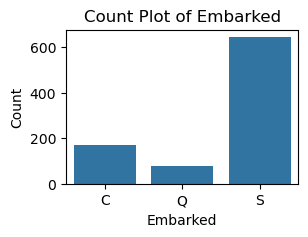

In [76]:
# Plotting bar charts for categorical variables:
# Identifying categorical variables
categorical_variables = ['Survived', 'Pclass', 'Sex', 'Embarked']
# Looping through each categorical variable and create a bar plot
for var in categorical_variables:
    plt.figure(figsize=(3, 2))
    sns.countplot(x=var, data=df_titanic)
    plt.title(f'Count Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

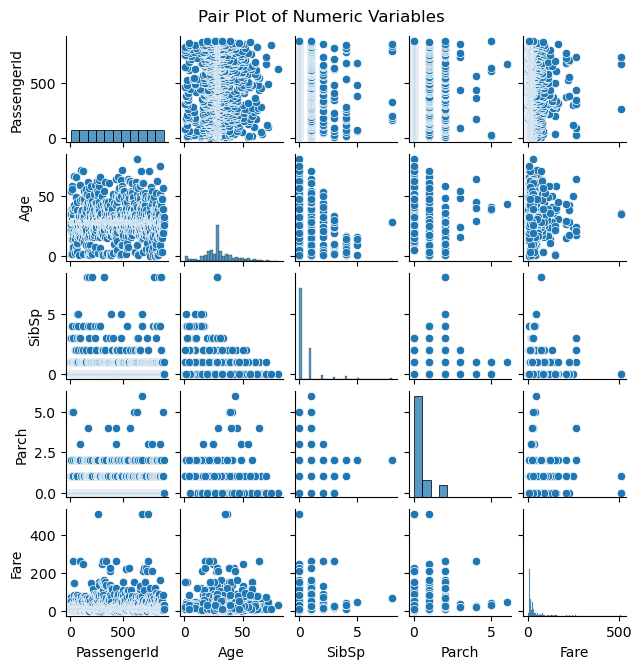

In [77]:
# Plotting pair plots for numerical variables:
# Listing the numeric variables to plot
numeric_vars = ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']
# Create a pair plot for the specified numeric variables
sns.pairplot(df_titanic[numeric_vars], height=1.3)
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

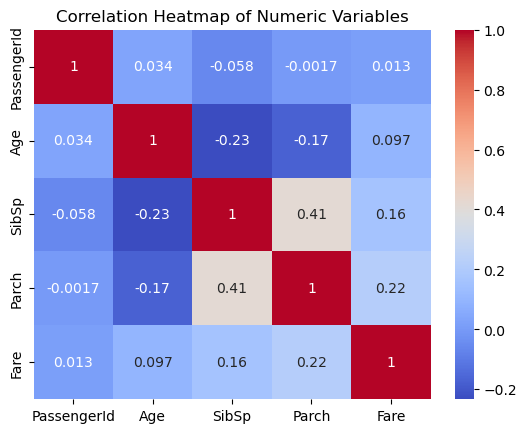

In [78]:
#Correlation matrix and heatmap
correlation_matrix = df_titanic[numeric_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

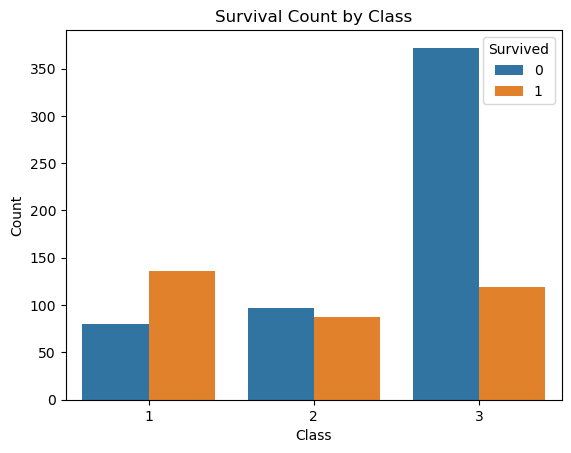

In [79]:
#2. Analyzing hypothesis of survival rate based on class, gender and age of the passenger with a plot:
# a) Survival Rate vs. Class of Passenger
sns.countplot(x='Pclass', hue='Survived', data=df_titanic)
plt.title('Survival Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
# Analysis for above Survival Rate vs. Class of Passenger plot above:
# Here, The legend indicates that blue bars represent passengers who did not survive, and orange bars represent passengers who survived.
# Here, where pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower
# (0 = No(not survived), 1 = Yes(survived))
#Class 1 (Upper SES):
# There are more survivors (orange bars) than non-survivors (blue bars).
# This indicates that passengers in Class 1 had a higher survival rate.
#Class 2 (Middle SES):
# The number of survivors and non-survivors is fairly balanced.
# This suggests that passengers in Class 2 had a moderate survival rate.
#Class 3 (Lower SES):
# There are significantly more non-survivors (blue bars) compared to survivors (orange bars).
# This indicates that passengers in Class 3 had a much lower survival rate.


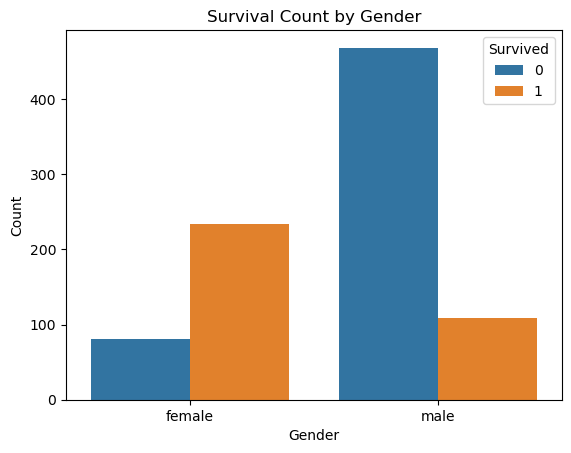

In [80]:
# b) Survival Rate vs. Gender of passenger
sns.countplot(x='Sex', hue='Survived', data=df_titanic)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
# Analysis for above Survival Rate vs. gender of Passenger plot above:
# Here, The legend indicates that blue bars represent passengers who did not survive, and orange bars represent passengers who survived.
# Females: A higher number of females survived compared to those who did not survive. This suggests that females had a higher survival rate.
# Males: A significantly higher number of males did not survive compared to those who did survive. This indicates that males had a lower survival rate.

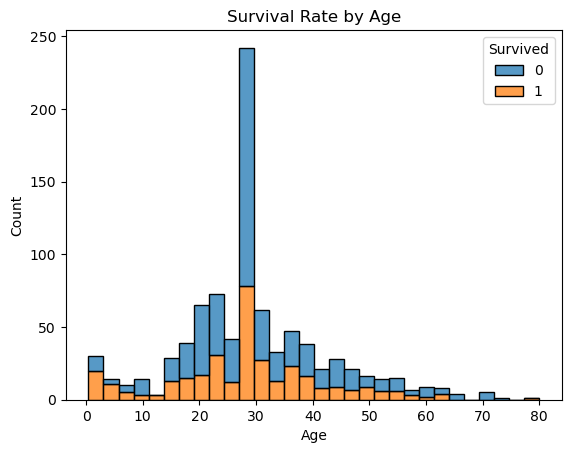

In [81]:
#c) Survival Rate vs. Age of passenger
sns.histplot(df_titanic, x='Age', hue='Survived', multiple='stack')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
# Analysis for above Survival Rate vs. Age of Passenger plot above:
# Younger Passengers: There is a noticeable higher survival rate among younger passengers, particularly those around age 0-10. This suggests that younger children had a better chance of survival.
# Middle-Aged Passengers: The age group around 20-40 shows a mix of survivors and non-survivors, with a significant portion of non-survivors. The survival rate in this age range is relatively lower.
# Older Passengers: Passengers aged 50 and above show fewer survivors, indicating that older passengers had a lower survival rate.